In [5]:
# Title: Fraud Detection

# Task 1: An insurance company uses clustering algorithms to detect anomalous claims that might indicate fraud. Implement k-means clustering on the claims data and visualize the clusters to identify potential outliers.
# Task 2: A credit card issuer applies hierarchical clustering to transaction data to identify unusual spending patterns that could suggest fraudulent activity. Use dendrograms to visualize customer spending.
# Task 3: A bank leverages DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to find unusual spending patterns from data noise. Implement DBSCAN on a sample transaction dataset and identify noise points as potential fraud.

Task 1: K-Means Clustering for Fraud Detection


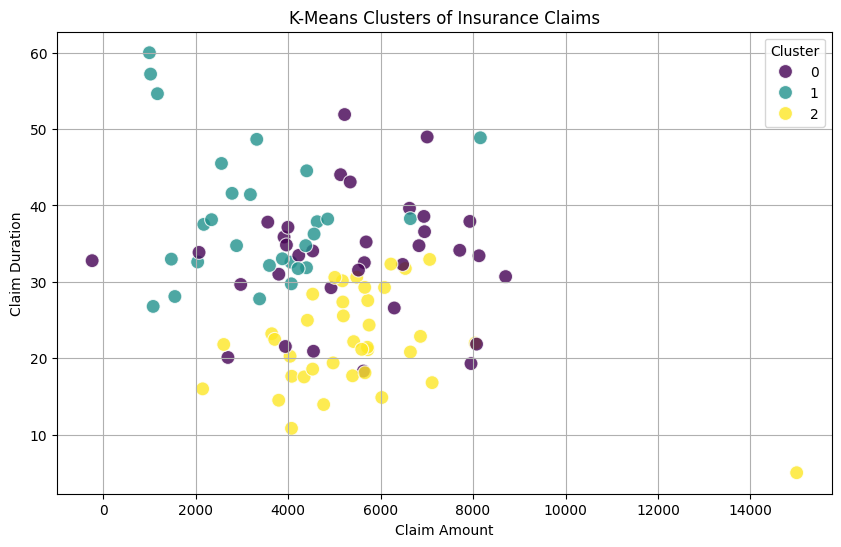

Potential **outliers (fraud)** might be in smaller, isolated clusters or points far from cluster centers.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print("Task 1: K-Means Clustering for Fraud Detection")

# Generate synthetic claims data
np.random.seed(42)
claims_data = pd.DataFrame({
    'Claim_Amount': np.random.normal(5000, 2000, 100),
    'Claim_Duration': np.random.normal(30, 10, 100),
    'Age_of_Policyholder': np.random.randint(20, 70, 100)
})

# Introduce a couple of anomalous claims to simulate fraud
claims_data.loc[0] = [15000, 5, 25]  # High amount, short duration
claims_data.loc[1] = [1000, 60, 65]  # Low amount, very long duration

# Ensure columns are numeric (important after manual assignment)
claims_data['Claim_Amount'] = pd.to_numeric(claims_data['Claim_Amount'])
claims_data['Claim_Duration'] = pd.to_numeric(claims_data['Claim_Duration'])

# Scale the data for K-Means
scaler = StandardScaler()
claims_scaled = scaler.fit_transform(claims_data[['Claim_Amount', 'Claim_Duration', 'Age_of_Policyholder']])

# Apply K-Means clustering
# n_init='auto' (default in recent sklearn versions) or explicit int like 10 is good.
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(claims_scaled)
claims_data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Claim_Amount', y='Claim_Duration', hue='Cluster', data=claims_data, palette='viridis', s=100, alpha=0.8)
plt.title('K-Means Clusters of Insurance Claims')
plt.xlabel('Claim Amount')
plt.ylabel('Claim Duration')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("Potential **outliers (fraud)** might be in smaller, isolated clusters or points far from cluster centers.")


Task 2: Hierarchical Clustering for Fraud Detection


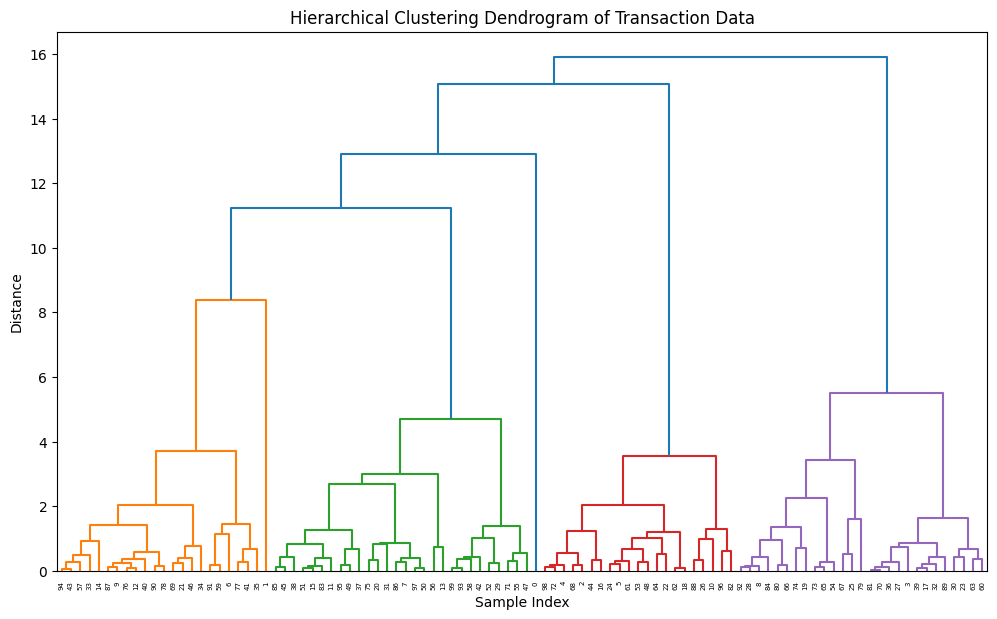

Unusual spending patterns (potential **fraud**) can be identified by clusters with fewer members or long branches indicating high dissimilarity.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

print("\nTask 2: Hierarchical Clustering for Fraud Detection")

# Generate synthetic transaction data
np.random.seed(42)
transaction_data = pd.DataFrame({
    'Transaction_Amount': np.random.normal(100, 50, 100),
    'Transactions_per_Day': np.random.normal(5, 2, 100),
    'Merchant_Category': np.random.choice(['Retail', 'Online', 'Food', 'Travel'], 100)
})

# Introduce a couple of unusual spending patterns
transaction_data.loc[0] = [1000, 1, 'Online']  # High amount, low frequency
transaction_data.loc[1] = [20, 20, 'Food']     # Low amount, very high frequency

# One-hot encode the categorical 'Merchant_Category'
transaction_data_encoded = pd.get_dummies(transaction_data, columns=['Merchant_Category'], drop_first=True)

# Scale the numerical features
scaler_hc = StandardScaler()
transaction_scaled = scaler_hc.fit_transform(transaction_data_encoded)

# Perform hierarchical clustering using 'ward' linkage
linked = linkage(transaction_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram of Transaction Data')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

print("Unusual spending patterns (potential **fraud**) can be identified by clusters with fewer members or long branches indicating high dissimilarity.")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

print("\nTask 3: DBSCAN for Fraud Detection")

# Generate synthetic transaction data for DBSCAN
np.random.seed(42)
dbscan_data = pd.DataFrame({
    'Transaction_Value': np.random.normal(200, 80, 100),
    'Time_Since_Last_Transaction': np.random.normal(10, 5, 100)
})

# Introduce some explicit noise points (potential fraudulent transactions)
dbscan_data.loc[0] = [1500, 1]   # Very high value, very recent
dbscan_data.loc[1] = [50, 100]   # Very low value, very long time since last transaction
dbscan_data.loc[2] = [1200, 2]   # High value, recent

# Scale the data for DBSCAN
scaler_dbscan = StandardScaler()
dbscan_scaled = scaler_dbscan.fit_transform(dbscan_data)

# Apply DBSCAN clustering
# You might need to tune eps and min_samples based on your specific dataset characteristics.
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(dbscan_scaled)
dbscan_data['Cluster'] = clusters_dbscan

# Visualize the DBSCAN clusters
plt.figure(figsize=(10, 6))
# Use 'viridis' palette, and a different marker/size for noise points if desired
sns.scatterplot(x='Transaction_Value', y='Time_Since_Last_Transaction', hue='Cluster',
                data=dbscan_data, palette='viridis', s=100, alpha=0.8)
plt.title('DBSCAN Clustering of Transaction Data')
plt.xlabel('Transaction Value (Scaled)')
plt.ylabel('Time Since Last Transaction (Scaled)')
plt.legend(title='Cluster (-1 is Noise)')
plt.grid(True)
plt.show()

# Identify noise points (cluster -1)
noise_points = dbscan_data[dbscan_data['Cluster'] == -1]
print("\n**Noise Points (Potential Fraudulent Transactions):**")
print(noise_points)

print("\nDBSCAN identifies **noise (-1 cluster)** as potential fraudulent transactions because these points do not belong to any dense region.")